# Simple MNIST CNN Classifier 

**Description:** Simple example of CNN MNIST Classifier <br>
Accuracy is 99% test dataset<br>
**Dataset:** Classical MNIST dataset <br>

In [11]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # to avoid warning messages

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [6]:
def Analyze_training(h):
# summarize history for accuracy
# history.history.keys() -> dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
   plt.plot(h.history['accuracy'])
   plt.plot(h.history['val_accuracy'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Train the model

In [9]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/15
469/469 [==============================] - 20s 42ms/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0253 - val_accuracy: 0.9912
Epoch 2/15
469/469 [==============================] - 21s 45ms/step - loss: 0.0305 - accuracy: 0.9900 - val_loss: 0.0256 - val_accuracy: 0.9912
Epoch 3/15
469/469 [==============================] - 23s 49ms/step - loss: 0.0295 - accuracy: 0.9900 - val_loss: 0.0251 - val_accuracy: 0.9914
Epoch 4/15
469/469 [==============================] - 24s 50ms/step - loss: 0.0277 - accuracy: 0.9909 - val_loss: 0.0239 - val_accuracy: 0.9923
Epoch 5/15
469/469 [==============================] - 21s 45ms/step - loss: 0.0277 - accuracy: 0.9908 - val_loss: 0.0251 - val_accuracy: 0.9920
Epoch 6/15
469/469 [==============================] - 20s 42ms/step - loss: 0.0257 - accuracy: 0.9912 - val_loss: 0.0250 - val_accuracy: 0.9909
Epoch 7/15
469/469 [==============================] - 19s 41ms/step - loss: 0.0269 - accuracy: 0.9910 - val_loss: 0.0260 - val_accuracy:

## Evaluate the trained model

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02385857328772545
Test accuracy: 0.9915000200271606


Test loss: 0.022973069921135902
Test accuracy: 0.9925000071525574
Train accuracy: 0.9982333183288574


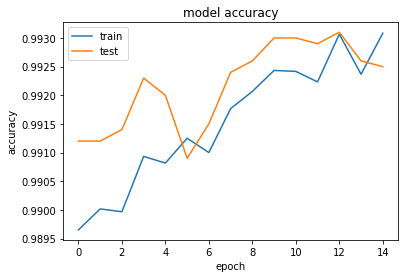

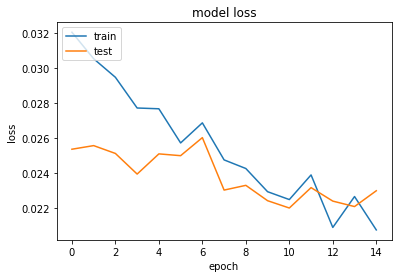

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Analyze_training(history)